In [36]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import IsolationForest

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

try:
  from google.colab import drive
  IN_COLAB = True
  print("running in COLAB environment")
except:
  IN_COLAB = False
  print("running in LOCAL environment")


if IN_COLAB:
    df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/csgo_round_snapshots.csv")
else:
    df = pd.read_csv("csgo_round_snapshots.csv")

running in LOCAL environment


In [37]:
PcaNumberOfCompontents = 40
    # number of dimensions after downsizing data set using PCA

TestSize = 0.15
    # float between 0 and 1 - ratio of data that will be seperated and used as testing data in training various models

SeparateMaps = True
    # bool - decide if you want replace map column with multiple columns, one for each map

NeighboursCount = 40
    # number of neighbours in KNeighboursClassifier

In [38]:
df

,time_left,ct_score,t_score,map,bomb_planted,ct_health,t_health,ct_armor,t_armor,ct_money,...,t_grenade_flashbang,ct_grenade_smokegrenade,t_grenade_smokegrenade,ct_grenade_incendiarygrenade,t_grenade_incendiarygrenade,ct_grenade_molotovgrenade,t_grenade_molotovgrenade,ct_grenade_decoygrenade,t_grenade_decoygrenade,round_winner
0,175.00,0.0,0.0,de_dust2,False,500.0,500.0,0.0,0.0,4000.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
1,156.03,0.0,0.0,de_dust2,False,500.0,500.0,400.0,300.0,600.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
2,96.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
3,76.03,0.0,0.0,de_dust2,False,391.0,400.0,294.0,200.0,750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
4,174.97,1.0,0.0,de_dust2,False,500.0,500.0,192.0,0.0,18350.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,CT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122405,15.41,11.0,14.0,de_train,True,200.0,242.0,195.0,359.0,100.0,...,2.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122406,174.93,11.0,15.0,de_train,False,500.0,500.0,95.0,175.0,11500.0,...,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,T
122407,114.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,4.0,3.0,5.0,1.0,0.0,0.0,5.0,0.0,0.0,T
122408,94.93,11.0,15.0,de_train,False,500.0,500.0,495.0,475.0,1200.0,...,5.0,0.0,3.0,0.0,0.0,0.0,4.0,0.0,0.0,T


In [39]:
df.keys()

Index(['time_left', 'ct_score', 't_score', 'map', 'bomb_planted', 'ct_health',
       't_health', 'ct_armor', 't_armor', 'ct_money', 't_money', 'ct_helmets',
       't_helmets', 'ct_defuse_kits', 'ct_players_alive', 't_players_alive',
       'ct_weapon_ak47', 't_weapon_ak47', 'ct_weapon_aug', 't_weapon_aug',
       'ct_weapon_awp', 't_weapon_awp', 'ct_weapon_bizon', 't_weapon_bizon',
       'ct_weapon_cz75auto', 't_weapon_cz75auto', 'ct_weapon_elite',
       't_weapon_elite', 'ct_weapon_famas', 't_weapon_famas',
       'ct_weapon_g3sg1', 't_weapon_g3sg1', 'ct_weapon_galilar',
       't_weapon_galilar', 'ct_weapon_glock', 't_weapon_glock',
       'ct_weapon_m249', 't_weapon_m249', 'ct_weapon_m4a1s', 't_weapon_m4a1s',
       'ct_weapon_m4a4', 't_weapon_m4a4', 'ct_weapon_mac10', 't_weapon_mac10',
       'ct_weapon_mag7', 't_weapon_mag7', 'ct_weapon_mp5sd', 't_weapon_mp5sd',
       'ct_weapon_mp7', 't_weapon_mp7', 'ct_weapon_mp9', 't_weapon_mp9',
       'ct_weapon_negev', 't_weapon_negev',

map
de_inferno     23811
de_dust2       22144
de_nuke        19025
de_mirage      18576
de_overpass    14081
de_train       13491
de_vertigo     11137
de_cache         145
Name: count, dtype: int64


Text(0, 0.5, 'Count')

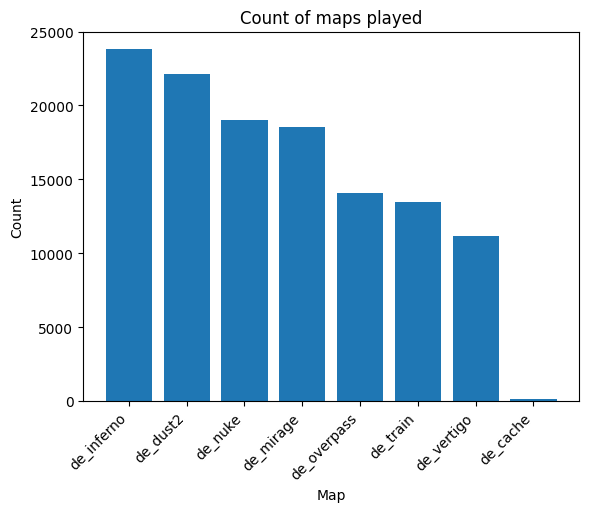

In [40]:

counts = df['map'].value_counts()
print(counts)
total = counts.sum()
percentages = counts / total * 100

plt.bar(counts.index, counts.values)

plt.xticks(rotation=45, ha='right')
plt.title('Count of maps played')
plt.xlabel('Map')
plt.ylabel('Count')

In [41]:
df.groupby('map')['map'].count()

map
de_cache         145
de_dust2       22144
de_inferno     23811
de_mirage      18576
de_nuke        19025
de_overpass    14081
de_train       13491
de_vertigo     11137
Name: map, dtype: int64

In [42]:
df.groupby('map')['map'].count().values

array([  145, 22144, 23811, 18576, 19025, 14081, 13491, 11137],
      dtype=int64)

In [43]:
df.groupby('map')['map'].count().values.reshape(-1, 1)

array([[  145],
       [22144],
       [23811],
       [18576],
       [19025],
       [14081],
       [13491],
       [11137]], dtype=int64)

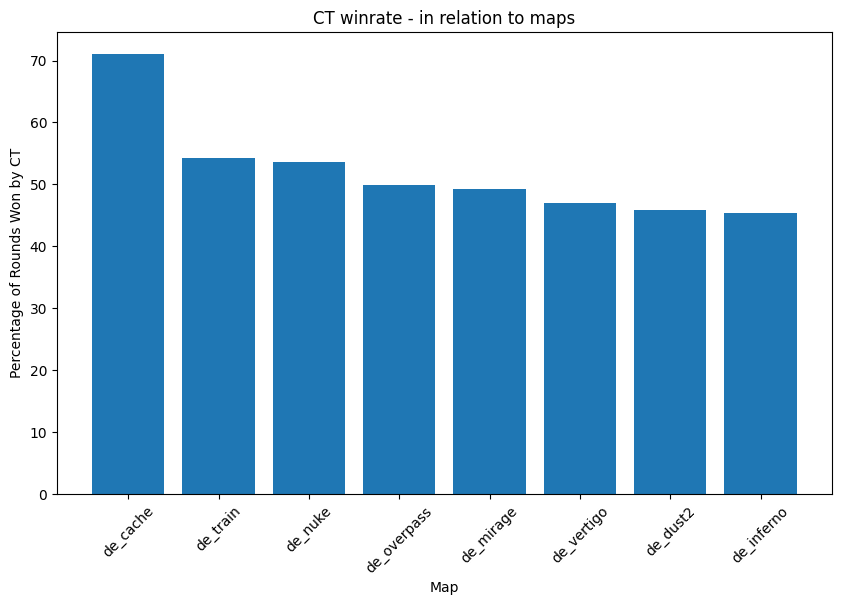

In [44]:
map_win_pct = df.groupby(['map', 'round_winner'])['round_winner'].count().unstack() / df.groupby('map')['map'].count().values.reshape(-1, 1)
ct_win_pct = map_win_pct['CT']*100

ct_win_pct = ct_win_pct.sort_values(ascending=False)

plt.figure(figsize=(10,6))
plt.bar(ct_win_pct.index, ct_win_pct)
plt.xticks(rotation=45)

plt.xlabel('Map')
plt.ylabel('Percentage of Rounds Won by CT')
plt.title('CT winrate - in relation to maps')
plt.show()

## following elements need to be converted to numbers:


| map      | bomb_planted | round_winner |
|----------|--------------|--------------|
| de_dust2 | False        | CT           |

Additionaly map can be converted to multiple columns, where each one conatins binary value.

In [45]:
# changing strings to nubmers

bool_to_numbers = {
    'False': 0,
    'True': 1
}

team_to_number = {
    'CT': 0,
    'T': 1
}

map_to_number = {
    'de_cache': 1,
    'de_dust2': 2,
    'de_inferno': 3,
    'de_mirage': 4,
    'de_nuke': 5,
    'de_overpass': 6,
    'de_train': 7,
    'de_vertigo': 8
}

if(SeparateMaps):
    mapColumns = pd.get_dummies(df['map'], dtype=int)
    df = df.drop('map', axis=1)
    df = pd.concat([df, mapColumns], axis=1)
else:
    df['map'] = df['map'].replace(map_to_number)

df['bomb_planted'] = df['bomb_planted'].replace(bool_to_numbers)
df['round_winner'] = df['round_winner'].replace(team_to_number)

attrToIndex = {attr: index for index, attr in enumerate(df.keys())}
print(attrToIndex)

{'time_left': 0, 'ct_score': 1, 't_score': 2, 'bomb_planted': 3, 'ct_health': 4, 't_health': 5, 'ct_armor': 6, 't_armor': 7, 'ct_money': 8, 't_money': 9, 'ct_helmets': 10, 't_helmets': 11, 'ct_defuse_kits': 12, 'ct_players_alive': 13, 't_players_alive': 14, 'ct_weapon_ak47': 15, 't_weapon_ak47': 16, 'ct_weapon_aug': 17, 't_weapon_aug': 18, 'ct_weapon_awp': 19, 't_weapon_awp': 20, 'ct_weapon_bizon': 21, 't_weapon_bizon': 22, 'ct_weapon_cz75auto': 23, 't_weapon_cz75auto': 24, 'ct_weapon_elite': 25, 't_weapon_elite': 26, 'ct_weapon_famas': 27, 't_weapon_famas': 28, 'ct_weapon_g3sg1': 29, 't_weapon_g3sg1': 30, 'ct_weapon_galilar': 31, 't_weapon_galilar': 32, 'ct_weapon_glock': 33, 't_weapon_glock': 34, 'ct_weapon_m249': 35, 't_weapon_m249': 36, 'ct_weapon_m4a1s': 37, 't_weapon_m4a1s': 38, 'ct_weapon_m4a4': 39, 't_weapon_m4a4': 40, 'ct_weapon_mac10': 41, 't_weapon_mac10': 42, 'ct_weapon_mag7': 43, 't_weapon_mag7': 44, 'ct_weapon_mp5sd': 45, 't_weapon_mp5sd': 46, 'ct_weapon_mp7': 47, 't_weap

In [46]:
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_features, columns=df.columns)



{'whiskers': [<matplotlib.lines.Line2D at 0x211029f20b0>,
 'caps': [<matplotlib.lines.Line2D at 0x211029f25f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x211029f1e10>,
 'medians': [<matplotlib.lines.Line2D at 0x211029f2b30>,
 'fliers': [<matplotlib.lines.Line2D at 0x211029f2dd0>,
 'means': []}

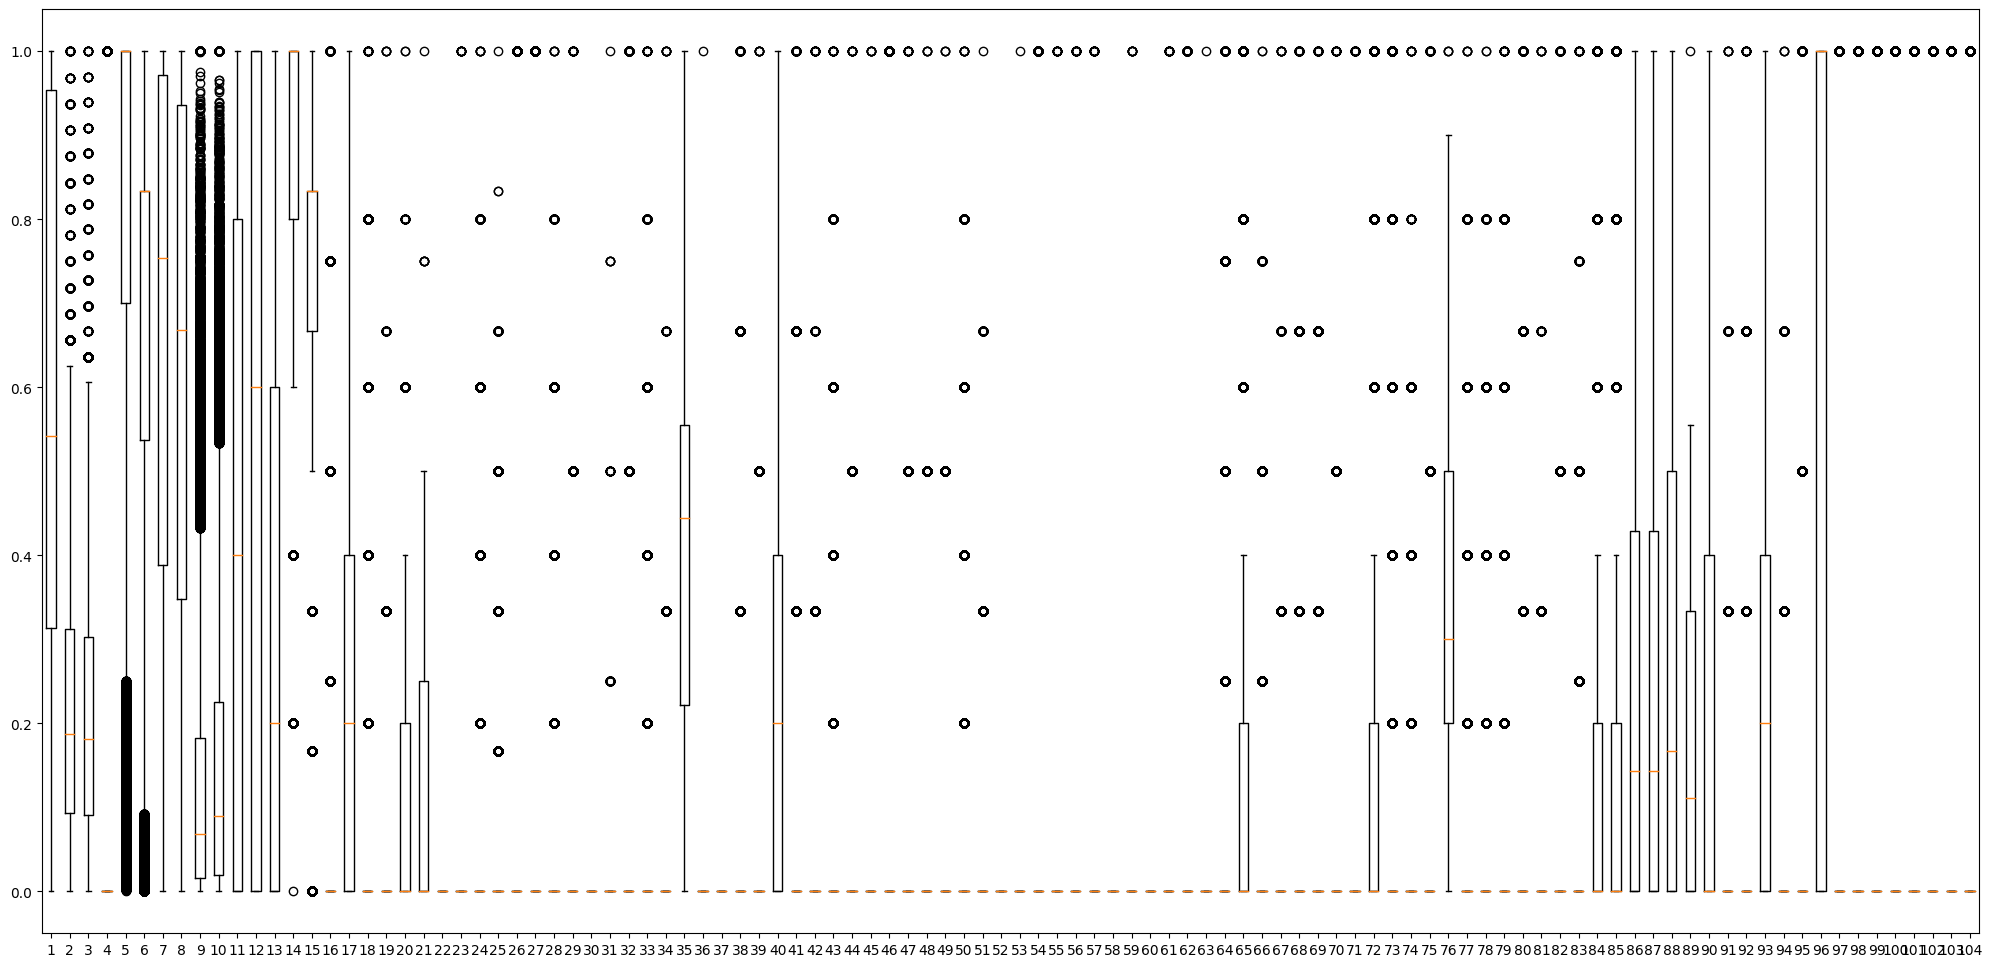

In [47]:
fig, ax = plt.subplots(figsize=(25,12))

ax.boxplot(scaled_df.to_numpy())

In [48]:
from sklearn.ensemble import IsolationForest

IF = IsolationForest(n_estimators=100, max_samples='auto', contamination='auto')
IF.fit(scaled_df)

IsolationForest()

In [49]:
if_results = IF.predict(scaled_df)  
scaled_df_without_outliers = scaled_df[if_results==1]
outliers = scaled_df[if_results==-1]

class_results = scaled_df_without_outliers['round_winner']
scaled_df_without_outliers = scaled_df_without_outliers.drop('round_winner',axis=1)

In [50]:
print(scaled_df.shape)
print(scaled_df_without_outliers.shape)
print(class_results.shape)
print(max(scaled_df_without_outliers.to_numpy()[:,0]))

(122410, 104)
(121977, 103)
(121977,)
0.9999999999999999


In [51]:
# check missing data
missing_data = df.isnull()
print(missing_data.sum().sum())

0


In [52]:
# counts = df['map'].value_counts()
# print(counts)

# counts = scaled_df['map'].value_counts()
# print(counts)

In [53]:
from sklearn.decomposition import PCA

pca = PCA(n_components=PcaNumberOfCompontents)
pca.fit(scaled_df_without_outliers)

scaled_df_without_outliers_pca = pca.transform(scaled_df_without_outliers)
print(scaled_df_without_outliers_pca.shape) 
print(pca.explained_variance_ratio_)

(121977, 40)
[0.21906579 0.11853604 0.09601969 0.06148409 0.05520826 0.04992488
 0.04147718 0.03639674 0.03127278 0.02657878 0.02417985 0.02039318
 0.01916018 0.01676107 0.01385629 0.01276962 0.01017111 0.00971731
 0.00861683 0.00719253 0.0069793  0.00658344 0.00613851 0.00579396
 0.0052905  0.00514127 0.00507541 0.00443186 0.00423902 0.00417972
 0.00407641 0.00378945 0.0036284  0.00350451 0.00313525 0.00282825
 0.00256443 0.0024844  0.0024373  0.0023529 ]


# Learining

#### prepare to learning:

In [54]:
from sklearn.model_selection import train_test_split

# classifiers:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# divide data:
x_scaled_train, x_scaled_test, y_scaled_train, y_scaled_test = train_test_split(scaled_df_without_outliers_pca, class_results, test_size=TestSize, shuffle=True, random_state=None, stratify=class_results)

#### KNeighboursClassifier method:

In [55]:



knn = KNeighborsClassifier(n_neighbors=NeighboursCount, weights='distance', algorithm='ball_tree')



In [56]:
knn.fit(x_scaled_train,y_scaled_train)

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=40, weights='distance')

In [57]:
knn.score(x_scaled_test,y_scaled_test)

0.8031371263048587

Result of learning without dividing map column:

    0.7997264770240701

    0.7967084039586637

    0.8017495899398579
    
Result of learning with dividing map column:

    0.8035332199484282

    0.8089063953170305

    0.8106234305055137

#### RandomForestClassifier method:

In [58]:


rfc = RandomForestClassifier()


In [59]:
rfc.fit(x_scaled_train, y_scaled_train)

RandomForestClassifier()

In [60]:
rfc.score(x_scaled_test,y_scaled_test)


0.8350549270372192

Result of learning without dividing map column:
    
    0.8375857338820302

    0.8338892230302367

    0.8307271733187535

Result of learning with dividing map column:

    0.8308004608547759

    0.8299141090869303

    0.8367725734250464

# Models evaluation

In [61]:
y_pred_knn = knn.predict(x_scaled_test)


In [62]:
print('knn accuracy: ', accuracy_score(y_scaled_test, y_pred_knn))
print('knn precision: ', precision_score(y_scaled_test, y_pred_knn))
print('knn recall: ', recall_score(y_scaled_test, y_pred_knn))
print('knn f1-score: ', f1_score(y_scaled_test, y_pred_knn))

knn accuracy:  0.8031371263048587
knn precision:  0.817677104152787
knn recall:  0.7897897897897898
knn f1-score:  0.8034915439170758


In [63]:
confusion_matrix(y_scaled_test, y_pred_knn)

array([[7331, 1642],
       [1960, 7364]], dtype=int64)

In [64]:
y_pred_rfc = rfc.predict(x_scaled_test)

In [65]:
print('rfc accuracy: ', accuracy_score(y_scaled_test, y_pred_rfc))
print('rfc precision: ', precision_score(y_scaled_test, y_pred_rfc))
print('rfc recall: ', recall_score(y_scaled_test, y_pred_rfc))
print('rfc f1-score: ', f1_score(y_scaled_test, y_pred_rfc))

rfc accuracy:  0.8350549270372192
rfc precision:  0.8539515042658284
rfc recall:  0.8158515658515658
rfc f1-score:  0.8344668714348399


In [66]:
confusion_matrix(y_scaled_test, y_pred_rfc)

array([[7672, 1301],
       [1717, 7607]], dtype=int64)